In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# 1. Read in data set, explore

In [2]:
# Load the processed data

df_telecom = pd.read_csv('../telecom_data1.csv')

In [3]:
df_telecom.head(3)

,ID,Customer_id,Interaction,UID,zip,Lat,Lng,City,State,Population,County,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,fav_color,Credit_card,Churn,Gender,SeniorCitizen,Contract,Partner,Depend,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,TotalCharge,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,4cb75839-4807-45e3-a9da-794e9ce53972,34536072f30ba5acb148becdfc5a0c34,23176,37.57039,-76.42148,Wake,VA,331,Middlesex,Urban,America/New_York,"Production designer, theatre/television/film",1,68,Regular High School Diploma,Full Time,21242.88,Married,DarkCyan,JCB 16 digit,Yes,Female,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,89.979239,577.760466,3,3,2,2,2,4,2,3
1,2,S120509,84632dbc-39c2-4b11-b840-577fd97ef223,2a6346e985cb7a3f29678436fcd66912,30114,34.24692,-84.52571,Canton,GA,53210,Cherokee,Suburban,America/New_York,Radiation protection practitioner,0,70,Associate's Degree,Full Time,5832.98,Married,LightPink,VISA 16 digit,No,Male,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,94.973002,138.171459,2,2,2,3,4,1,2,2
2,3,K191035,cf372768-93dc-4021-a0c0-8222b6f5d53b,8eebc9f5cdff8d844fa63f873954d459,25253,38.92317,-81.96954,Letart,WV,2230,Mason,Urban,America/New_York,Industrial/product designer,1,86,Associate's Degree,Student,39798.11,Married,OldLace,Mastercard,Yes,Male,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,99.947583,1587.135294,2,3,3,2,4,2,2,3


In [4]:
#df_telecom.describe()
#df_telecom.dtypes

In [5]:
# Define features and target variables

X = df_telecom.drop('TotalCharge',axis=1)   #Feature Matrix
Y = df_telecom['TotalCharge']          #Target Variable

# Print dimensions
print(X.shape)
print(Y.shape)

(10000, 49)
(10000,)


# 2. Feature Engineering

## Variable transformation 

count    10000.000000
mean      3261.465927
std       2520.459904
min        -24.360449
25%        749.990539
50%       3129.475190
75%       5723.559858
max       8095.077829
Name: TotalCharge, dtype: float64


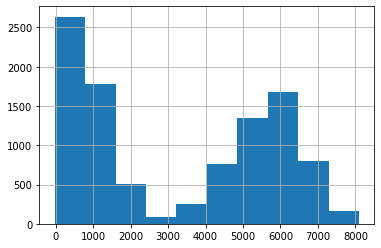

In [6]:
# Summary of Y variable

print(Y.describe())
Y.hist()

In [7]:
# transform zip to categorical

X['zip']= X['zip'].astype('str')

## Variable selection

### Continuous variables

In [8]:
# Cont cols (normalize for KNN)

# Continuous cols (normalize-for KNN)
cols_cont = ['Population', 'Children', 'Lat', 'Lng', 'Income', 'Age', 'Tenure', 'MonthlyCharge']
X_cont = X[cols_cont]
X_cont.head(3)

,Population,Children,Lat,Lng,Income,Age,Tenure,MonthlyCharge
0,331,1,37.57039,-76.42148,21242.88,68,6.795513,89.979239
1,53210,0,34.24692,-84.52571,5832.98,70,1.156681,94.973002
2,2230,1,38.92317,-81.96954,39798.11,86,15.754144,99.947583


### Categorical variables

In [9]:
# Cat cols-full list

cols_cat_all = X.loc[:, X.dtypes == np.object].columns.values.tolist() #have to translate back to list format
cols_cat_all = cols_cat_all[3:] #remove the first three cols, related to cust ID


In [10]:
# Cat cols-only those with limited tot unique value (otherwise too many categories created for dummies)

t = X[cols_cat_all].nunique().sort_values(ascending=False)
t = t.loc[lambda t: t < 20]  # change value to what is desired here, from 20
cols_cat_all_red = t.index.values.tolist()
X[cols_cat_all_red].nunique().to_frame('tot unique') #updated reduced list 


,tot unique
Education,12
Credit_card,10
Employment,5
Marital,5
PaymentMethod,4
Area,3
InternetService,3
Contract,3
Partner,2
OnlineBackup,2


In [11]:
# 1. Create dummies-for categorical cols (use reduced col list)

X_cat = pd.get_dummies(X[cols_cat_all_red], drop_first=True) # drop first as it is redundant
print('number of cat cols chosen: ', X[cols_cat_all_red].shape[1])
print('total cat cols after one hot encoding: ', X_cat.shape[1])
X_cat.head(3)

number of cat cols chosen:  22
total cat cols after one hot encoding:  51


,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Credit_card_Diners Club / Carte Blanche,Credit_card_Discover,Credit_card_JCB 15 digit,Credit_card_JCB 16 digit,Credit_card_Maestro,Credit_card_Mastercard,Credit_card_VISA 13 digit,Credit_card_VISA 16 digit,Credit_card_Voyager,Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Area_Suburban,Area_Urban,InternetService_Fiber Optic,InternetService_None,Contract_One year,Contract_Two Year,Partner_Yes,OnlineBackup_Yes,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes,DeviceProtection_Yes,Multiple_Yes,OnlineSecurity_Yes,Phone_Yes,Depend_Yes,Churn_Yes,Gender_Male,PaperlessBilling_Yes,SeniorCitizen_Yes
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,1,1,1,0,1,1,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,1,1,1


In [12]:
# 2. For Naive Bayes, choose all cat columns and label encode 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

X_cat_nb = X[cols_cat_all].apply(le.fit_transform)
print('number of cat cols in NB: ', X[cols_cat_all].shape[1])
print('total cat cols in NB after one hot encoding: ', X_cat_nb.shape[1])
X_cat_nb.head(3) 

number of cat cols in NB:  29
total cat cols in NB after one hot encoding:  29


,zip,City,State,County,Area,Timezone,Job,Education,Employment,Marital,fav_color,Credit_card,Churn,Gender,SeniorCitizen,Contract,Partner,Depend,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
0,1277,5701,46,934,2,16,461,9,0,1,22,4,1,0,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1
1,1984,785,10,275,1,16,494,1,0,1,69,8,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0
2,1479,2992,50,886,2,16,316,1,3,1,96,6,1,1,1,2,1,0,0,1,1,0,0,0,0,0,1,1,1


In [13]:
# Join Cat and Noncat together

X_all = pd.concat([X_cont, X_cat],axis=1)
X_all_nb = pd.concat([X_cont, X_cat_nb],axis=1)

print('total cols for final df: ', X_all.shape[1]) 
print('total cols for final df, Naive Bayes: ',X_all_nb.shape[1])
X_all_nb.head()

total cols for final df:  59
total cols for final df, Naive Bayes:  37


,Population,Children,Lat,Lng,Income,Age,Tenure,MonthlyCharge,zip,City,State,County,Area,Timezone,Job,Education,Employment,Marital,fav_color,Credit_card,Churn,Gender,SeniorCitizen,Contract,Partner,Depend,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
0,331,1,37.57039,-76.42148,21242.88,68,6.795513,89.979239,1277,5701,46,934,2,16,461,9,0,1,22,4,1,0,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1
1,53210,0,34.24692,-84.52571,5832.98,70,1.156681,94.973002,1984,785,10,275,1,16,494,1,0,1,69,8,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0
2,2230,1,38.92317,-81.96954,39798.11,86,15.754144,99.947583,1479,2992,50,886,2,16,316,1,3,1,96,6,1,1,1,2,1,0,0,1,1,0,0,0,0,0,1,1,1
3,30493,0,40.19247,-74.71581,12503.37,25,17.087227,99.956840,7618,5490,31,927,2,16,385,4,0,0,68,8,0,0,1,2,0,0,0,1,0,1,0,0,0,1,0,1,3
4,582,1,38.24685,-97.34622,25201.82,66,1.670972,87.472036,5811,2083,16,880,2,2,329,0,0,0,28,2,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,3


# Train/Test Split Data

In [14]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_all, Y,
    test_size=0.3,
    random_state=1
)

# for Naive Bayes
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_all_nb, Y,
    test_size=0.3,
    random_state=1
)

In [15]:
# Print dimensions

print('Train cols: ', X_train.shape[1])
print('Test cols: ', X_test.shape[1])
print('Train cols, NB: ', X_train_nb.shape[1])
print('Test cols, NB: ', X_test_nb.shape[1])

Train cols:  59
Test cols:  59
Train cols, NB:  37
Test cols, NB:  37


# Predictive Modeling Techniques

# 1. KNN

This section covers KNN

In [16]:
# Load the K-Nearest Neighbors class
from sklearn.neighbors import KNeighborsRegressor

# Load the metrics libraries
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Scale the data for cols_cont 

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() #MinMaxScaler()

X_train_std = X_train.copy() #copy train features df for KNN
X_test_std = X_test.copy()  #copy test features df for KNN
X_train_std[cols_cont] = scaler.fit_transform(X_train_std[cols_cont]) 
X_test_std[cols_cont] = scaler.transform(X_test_std[cols_cont])

X_train_std.head(3)

,Population,Children,Lat,Lng,Income,Age,Tenure,MonthlyCharge,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Credit_card_Diners Club / Carte Blanche,Credit_card_Discover,Credit_card_JCB 15 digit,Credit_card_JCB 16 digit,Credit_card_Maestro,Credit_card_Mastercard,Credit_card_VISA 13 digit,Credit_card_VISA 16 digit,Credit_card_Voyager,Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Area_Suburban,Area_Urban,InternetService_Fiber Optic,InternetService_None,Contract_One year,Contract_Two Year,Partner_Yes,OnlineBackup_Yes,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes,DeviceProtection_Yes,Multiple_Yes,OnlineSecurity_Yes,Phone_Yes,Depend_Yes,Churn_Yes,Gender_Male,PaperlessBilling_Yes,SeniorCitizen_Yes
2228,-0.547116,-0.515964,1.153390,0.493116,-0.756185,-0.258758,-0.947131,-0.594675,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,1,1
5910,-0.620638,-0.980557,0.804360,1.168818,3.302808,0.753469,1.336839,0.745688,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,1,1
1950,-0.611738,0.877815,0.817062,-0.179405,-1.360163,0.753469,-1.240883,0.070756,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,0,0,1


In [18]:
# Train a K-Nearest Neighbors model

knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train_std, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [19]:
# Print overall test-set accuracy, precision, recall
y_pred = knn.predict(X_test_std)
error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
print('KNN RMSE value is:', error)
print('KNN R2:', r2_score(y_test, y_pred))

KNN RMSE value is: 674.495498669741
KNN R2: 0.9291823524730315


# 2. Decision Tree

This section covers Decision Trees

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
# Train a Random Forest

tree = DecisionTreeRegressor(max_depth=5)

tree.fit(X_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [24]:
# Print overall test-set accuracy, precision, recall
y_pred = tree.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
print('DT RMSE value is:', error)
print('DT R2:', r2_score(y_test, y_pred))

DT RMSE value is: 194.9419723315443
DT R2: 0.9940844640769655


# 3. Random Forest 

This section covers Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
# Train a Random Forest

forest = RandomForestRegressor(
    n_estimators=100,
    max_features=15,
    max_depth=5,
    random_state=1,
)
forest.fit(X_train, y_train) 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=15, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [27]:
# Print overall test-set accuracy, precision, recall
y_pred = forest.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
print('RF RMSE value is:', error)
print('RF R2:', r2_score(y_test, y_pred))

RF RMSE value is: 780.0859529326581
RF R2: 0.9052741960786588


## Feature Importance for Random Forest

In [28]:
feature_imp = pd.Series(forest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp[:10]

Tenure                         0.870248
Churn_Yes                      0.082710
MonthlyCharge                  0.011939
Lng                            0.005213
Population                     0.004002
Income                         0.003073
InternetService_Fiber Optic    0.003059
Age                            0.003006
Lat                            0.002782
Children                       0.001772
dtype: float64

No handles with labels found to put in legend.


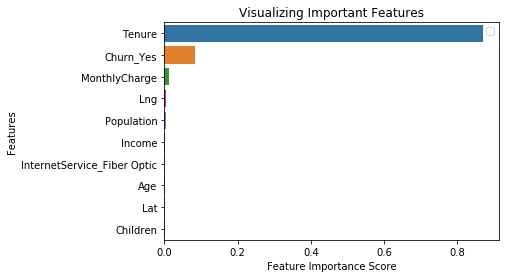

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[:10], y=feature_imp[:10].index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# 4. Advanced Regression

This section covers Ridge and Lasso Regression

In [31]:
from sklearn.linear_model import Ridge, Lasso, LassoCV

## Ridge

In [32]:
# Train Ridge model

ridge = Ridge(alpha=.01)
ridge.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
# Print overall test-set accuracy, precision, recall
y_pred = ridge.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
print('Ridge RMSE value is:', error)
print('Ridge R2:', r2_score(y_test, y_pred))

Ridge RMSE value is: 203.80782024882066
Ridge R2: 0.9935341582239735


## Lasso

In [34]:
# Train Lasso model

lasso = Lasso(alpha=485.824775)
lasso.fit(X_train, y_train)

Lasso(alpha=485.824775, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
# Print overall test-set accuracy, precision, recall
y_pred = lasso.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
print('Lasso RMSE value is:', error)
print('Lasso R2:', r2_score(y_test, y_pred))

Lasso RMSE value is: 218.43865932430347
Lasso R2: 0.9925725046378804


In [36]:
lasso = LassoCV()
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [37]:
print("Best alpha using built-in LassoCV: %f" % lasso.alpha_)
print("Best score using built-in LassoCV: %f" %lasso.score(X_train, y_train))
coef = pd.Series(lasso.coef_, index = X_train.columns)

Best alpha using built-in LassoCV: 485.824775
Best score using built-in LassoCV: 0.992687


In [38]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 55 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

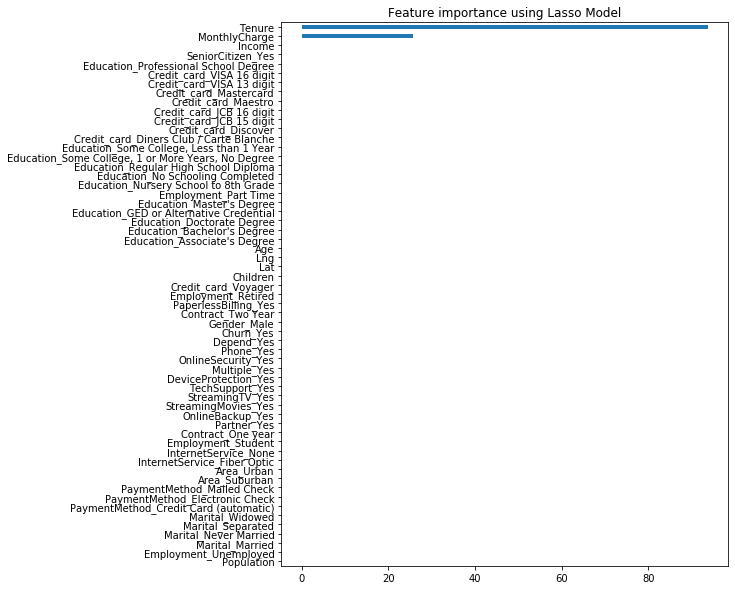

In [39]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Linear reg

In [40]:
# Train linear reg model 

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# Print overall test-set accuracy, precision, recall
y_pred = linear.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
print('LR RMSE value is:', error)
print('LR R2:', r2_score(y_test, y_pred))

LR RMSE value is: 203.8078395982587
LR R2: 0.9935341569962443


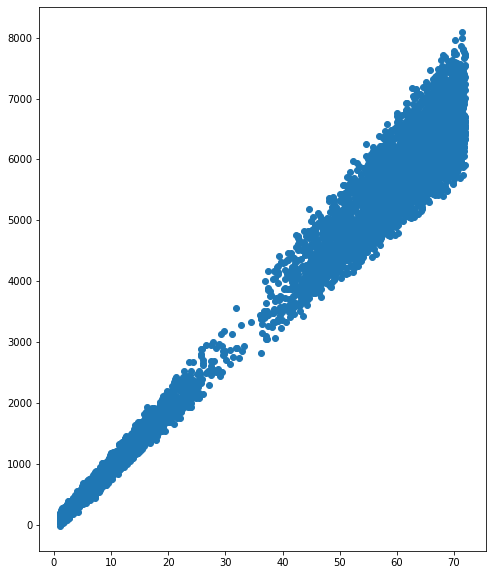

In [42]:
import matplotlib.pyplot as plt
plt.scatter(X_train.Tenure, y_train)

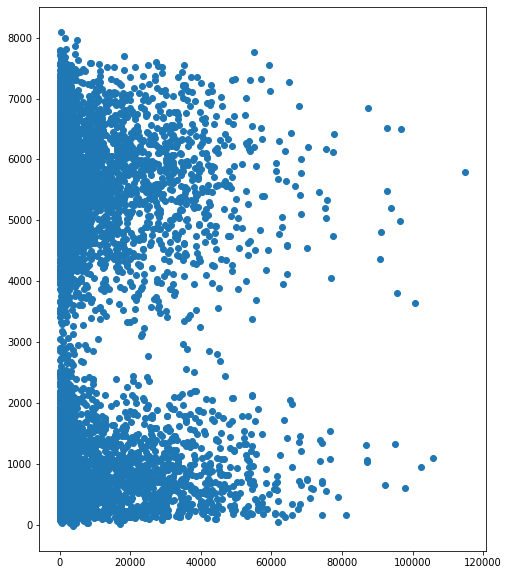

In [43]:
plt.scatter(X_train.Population, y_train)

In [44]:
X_train.Tenure.corr(y_train)

0.9914483022836755

In [73]:
t1 = []
t2 = []
for (columnName, columnData) in X_train.iteritems():
    t1.append(columnName)
    t2.append(columnData.corr(y_train))
    
df = pd.DataFrame({'X_train col': t1, 'Correlation': t2})

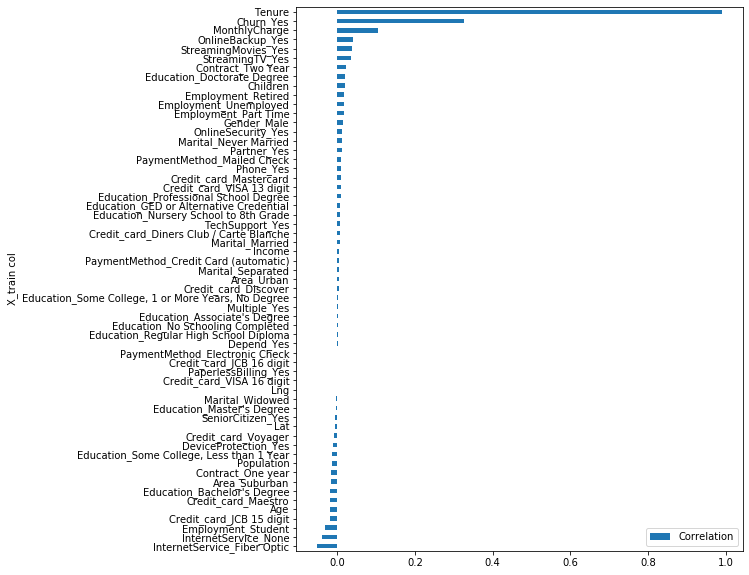

In [74]:
df.sort_values('Correlation',ascending=False)
df.sort_values('Correlation').plot.barh(x='X_train col', y='Correlation')

In [90]:
X_train.sample(3)

,Population,Children,Lat,Lng,Income,Age,Tenure,MonthlyCharge,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Credit_card_Diners Club / Carte Blanche,Credit_card_Discover,Credit_card_JCB 15 digit,Credit_card_JCB 16 digit,Credit_card_Maestro,Credit_card_Mastercard,Credit_card_VISA 13 digit,Credit_card_VISA 16 digit,Credit_card_Voyager,Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Area_Suburban,Area_Urban,InternetService_Fiber Optic,InternetService_None,Contract_One year,Contract_Two Year,Partner_Yes,OnlineBackup_Yes,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes,DeviceProtection_Yes,Multiple_Yes,OnlineSecurity_Yes,Phone_Yes,Depend_Yes,Churn_Yes,Gender_Male,PaperlessBilling_Yes,SeniorCitizen_Yes
2366,41665,0,33.81592,-84.55204,23913.39,60,1.582585,104.969934,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,1,1,0
683,1535,1,33.54826,-90.52479,7056.15,58,7.847288,82.484375,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3162,12824,3,39.90362,-75.29342,29721.03,55,1.481645,87.480560,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0


In [89]:
y_train = np.log(y_train) 
y_test = np.log(y_test) 

1    5184
0    1816
Name: Churn_Yes, dtype: int64